# ChatBot

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input , Embedding , LSTM , Dense , GlobalMaxPooling1D , Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

C:\Users\CHAMITH\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
%%writefile content.json
{"intents":
 [
     {
         "tag":"greatings",
         "input":["hello","hi there","nice to meet you","hi","hey there","hey"],
         "responses":[
             "Hi. welcome",
             "Hey yo, do you need help i ?",
             "Welcome aboard , how may i help you ?",
             "ahoy!!",
             "Hi random person , what do you want ?",
             "Hello my person , how can i help you ?",
             "Ha , Glad you showed up . How are you ?"
         ]
     } , 
     
     {
         "tag":"goodbye",
         "input":["Thank You" , "Thanks" , "Thanks for the info" , "bye" , "adios" , "ok.bye" , "goodbye" , "see you later" , "i will catch you later" ],
         "responses":[
             "okay, bye",
             "Have a nice day",
             "Adios",
             "Goodbye",
             "See you later",
             "nice conversation",
             "bye",
             "okay , have a nice day",
             "Take care",
             "We will meet soon",
             "Yeah sure . will talk to you later",
             "Okay , Take Care"
         ]
     } ,
     {
         "tag":"howami",
         "input":["how are you ?" , "i am fine" , "are you fine ?" , "how are things going on ?" , "everything going on okay ?" , "how is every thing is going"],
         "responses":[
             "Yeah , am fine",
             "Every thing is going on well",
             "Doing good . Thanks you are my best friend",
             "Things are great",
             "Yeah Fine , nothing much going in my life",
             "Everythings great",
             "I am doing good . Life is boring . Need to go on an adventure"
         ]
     } ,
     {
         "tag":"whoareyou",
         "input":["who are you ?" , "what are you ?" , "what is your name ?" , "are you a chatbot ?" , "what can i call you ?" , "your name ?" , "are you a bot ? "],
         "responses":[
             "I am a chatbot . You can call me Bchat",
             "I am a Bchat you could ask questions",
             "Bchat as your service",
             "My name is Bchat and yes i am a chat bot",
             "I am here to help you"
         ]
     } ,
     {
         "tag":"whereareyou",
         "input":["Where are you from ?" , "Which country are you from ?" , "Where do you live ?" , "Where are you ?" , "Where do you live in ?" , "which place do you live in"],
         "responses":[
             "I live in southern province",
             "I live in southern province . Pretty sure you would not have heared about that",
             "Souther province . thats where i live in"
         ]
     } ,
     
     {
         "tag":"join",
         "input":["How to get recruit ?" , "How to join ?" , "How do i get recruit ?" , "How do i join ?"],
         "responses":[
             "you need contact the nearest HR office once you have the complete the pre requisites",
             "contact the closet HR office from your location",
             "well. there are some pre-requisites and after you complete them , find the HR office"
             ]
     } ,
     
     {
         "tag":"whereisthehroffice",
         "input":["Where is the HR office located ?" , "location of the HR office ?" , "HR office's location ?" , "Where can i find the HR office ?"],
         "responses":[
             "That's up to you . use your skills",
             "They are present all over the city you live in . find them on your own . I can not give any more information",
             "There are a lot of HR offices in the city you are in . find them"
         ]
     } 
     
 ]
}

Overwriting content.json


### importing data

In [3]:
with open('content.json') as content:
    data1 = json.load(content)

### get all the data to list

In [4]:
tags = []
inputs = []
responses = {}
for intent in data1['intents']:
    responses[intent['tag']]=intent['responses']
    for lines in intent['input']:
        inputs.append(lines)
        tags.append(intent['tag'])
    

### converting to data frames

In [5]:
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

### printing the data

In [6]:
data

,inputs,tags
0,hello,greatings
1,hi there,greatings
2,nice to meet you,greatings
3,hi,greatings
4,hey there,greatings
5,hey,greatings
6,Thank You,goodbye
7,Thanks,goodbye
8,Thanks for the info,goodbye
9,bye,goodbye


In [7]:
data = data.sample(frac=1)

## Pre-Processing

### removing punctuations

In [8]:
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
10,adios,goodbye
9,bye,goodbye
26,your name,whoareyou
19,everything going on okay,howami
36,how do i get recruit,join
17,are you fine,howami
40,hr offices location,whereisthehroffice
0,hello,greatings
31,where are you,whereareyou
15,how are you,howami


### tokenize the data

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])

#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [10]:
input_shape = x_train.shape[1]
print(input_shape)

7


### define vocabulary

In [11]:
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length : ",output_length)

number of unique words :  61
output length :  7


# Neural Network

### creating the model

In [12]:
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model = Model(i,x)

### compiling the model

In [13]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

### train the model

In [14]:
train = model.fit(x_train,y_train,epochs=200)

Epoch 1/200
2/2 [==============================] - 1s 11ms/step - loss: 1.9458 - accuracy: 0.1667
Epoch 2/200
2/2 [==============================] - 0s 8ms/step - loss: 1.9431 - accuracy: 0.2381
Epoch 3/200
2/2 [==============================] - 0s 6ms/step - loss: 1.9412 - accuracy: 0.2619
Epoch 4/200
2/2 [==============================] - 0s 5ms/step - loss: 1.9392 - accuracy: 0.2857
Epoch 5/200
2/2 [==============================] - 0s 6ms/step - loss: 1.9370 - accuracy: 0.2857
Epoch 6/200
2/2 [==============================] - 0s 6ms/step - loss: 1.9349 - accuracy: 0.3095
Epoch 7/200
2/2 [==============================] - 0s 4ms/step - loss: 1.9327 - accuracy: 0.3095
Epoch 8/200
2/2 [==============================] - 0s 5ms/step - loss: 1.9307 - accuracy: 0.3095
Epoch 9/200
2/2 [==============================] - 0s 5ms/step - loss: 1.9282 - accuracy: 0.4286
Epoch 10/200
2/2 [==============================] - 0s 5ms/step - loss: 1.9259 - accuracy: 0.4524
Epoch 11/200
2/2 [==========

2/2 [==============================] - 0s 5ms/step - loss: 1.0368 - accuracy: 0.7143
Epoch 85/200
2/2 [==============================] - 0s 5ms/step - loss: 1.0193 - accuracy: 0.7143
Epoch 86/200
2/2 [==============================] - 0s 5ms/step - loss: 1.0020 - accuracy: 0.7143
Epoch 87/200
2/2 [==============================] - 0s 5ms/step - loss: 0.9864 - accuracy: 0.7143
Epoch 88/200
2/2 [==============================] - 0s 5ms/step - loss: 0.9721 - accuracy: 0.7143
Epoch 89/200
2/2 [==============================] - 0s 5ms/step - loss: 0.9582 - accuracy: 0.7143
Epoch 90/200
2/2 [==============================] - 0s 5ms/step - loss: 0.9433 - accuracy: 0.7381
Epoch 91/200
2/2 [==============================] - 0s 5ms/step - loss: 0.9281 - accuracy: 0.7381
Epoch 92/200
2/2 [==============================] - 0s 4ms/step - loss: 0.9128 - accuracy: 0.7381
Epoch 93/200
2/2 [==============================] - 0s 6ms/step - loss: 0.8961 - accuracy: 0.7619
Epoch 94/200
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.3542 - accuracy: 0.9286
Epoch 168/200
2/2 [==============================] - 0s 5ms/step - loss: 0.3508 - accuracy: 0.9286
Epoch 169/200
2/2 [==============================] - 0s 5ms/step - loss: 0.3472 - accuracy: 0.9286
Epoch 170/200
2/2 [==============================] - 0s 5ms/step - loss: 0.3427 - accuracy: 0.9286
Epoch 171/200
2/2 [==============================] - 0s 6ms/step - loss: 0.3375 - accuracy: 0.9286
Epoch 172/200
2/2 [==============================] - 0s 5ms/step - loss: 0.3343 - accuracy: 0.9286
Epoch 173/200
2/2 [==============================] - 0s 5ms/step - loss: 0.3320 - accuracy: 0.9286
Epoch 174/200
2/2 [==============================] - 0s 5ms/step - loss: 0.3275 - accuracy: 0.9286
Epoch 175/200
2/2 [==============================] - 0s 5ms/step - loss: 0.3250 - accuracy: 0.9286
Epoch 176/200
2/2 [==============================] - 0s 5ms/step - loss: 0.3199 - accuracy: 0.9286
Epoch 177/200
2/2 [=====

# Model Analysis

### plotting the model accuracy

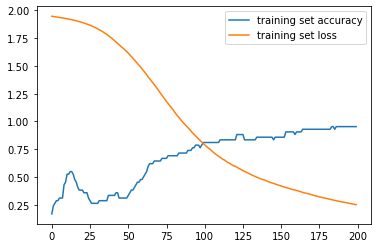

In [15]:
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

# Testing 

### chatting

In [ ]:
import random

while True:
    texts_p = []
    prediction_input = input('You : ')
    
    #removing punctuation and converting to lowercase
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)
    
    #tokenizing and padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input],input_shape)
    
    #getting output from model
    output = model.predict(prediction_input)
    output = output.argmax()
    
    #finding the right tag and predicting
    response_tag = le.inverse_transform([output])[0]
    print("Bchat : ",random.choice(responses[response_tag]))
    if response_tag == "good bye":
        break

You : hi
1/1 [==============================] - 0s 305ms/step
Bchat :  Take care
You : who are you
1/1 [==============================] - 0s 48ms/step
Bchat :  Bchat as your service
You : are you chatbot
1/1 [==============================] - 0s 57ms/step
Bchat :  Bchat as your service
You : who are you
1/1 [==============================] - 0s 47ms/step
Bchat :  I am a Bchat you could ask questions
You : where is from
1/1 [==============================] - 0s 49ms/step
Bchat :  Souther province . thats where i live in
You : great
1/1 [==============================] - 0s 46ms/step
Bchat :  Take care
You : good bye
1/1 [==============================] - 0s 49ms/step
Bchat :  Goodbye
You : bye
1/1 [==============================] - 0s 32ms/step
Bchat :  Take care
You : thank you
1/1 [==============================] - 0s 35ms/step
Bchat :  okay, bye
